In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
avocado = pd.read_csv('/content/avocado.csv', index_col=[0])

In [3]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
#4046 - non organic small/medium hass Avocados
#4425 - non organic large avocado
#4770 - extra large avocado

In [5]:
#avocado.drop(columns = 'Unnamed: 0', inplace = True)

In [6]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [7]:
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
avocado['Date'] = pd.to_datetime(avocado['Date'])

In [9]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


<Axes: xlabel='AveragePrice', ylabel='Density'>

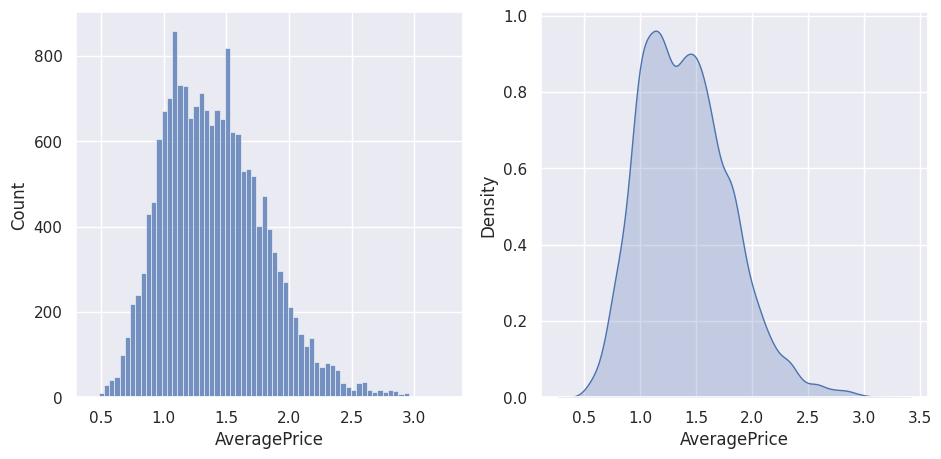

In [14]:
sns.set_theme()

fig, ax = plt.subplots(1, 2, figsize = (11, 5))

sns.histplot(avocado['AveragePrice'], ax = ax[0])
sns.kdeplot(avocado['AveragePrice'], ax = ax[1], fill = True)

In [11]:
print('total number of regions: ', avocado['region'].nunique())
print('total number of types: ', avocado['type'].nunique())

print('types: ',avocado['type'].unique())

total number of regions:  54
total number of types:  2
types:  ['conventional' 'organic']


([<matplotlib.patches.Wedge at 0x78f7a32ee8f0>,
 [Text(-0.00028404485245154447, 1.0999999633266004, 'conventional'),
  Text(0.0002840448524518983, -1.0999999633266004, 'organic')])

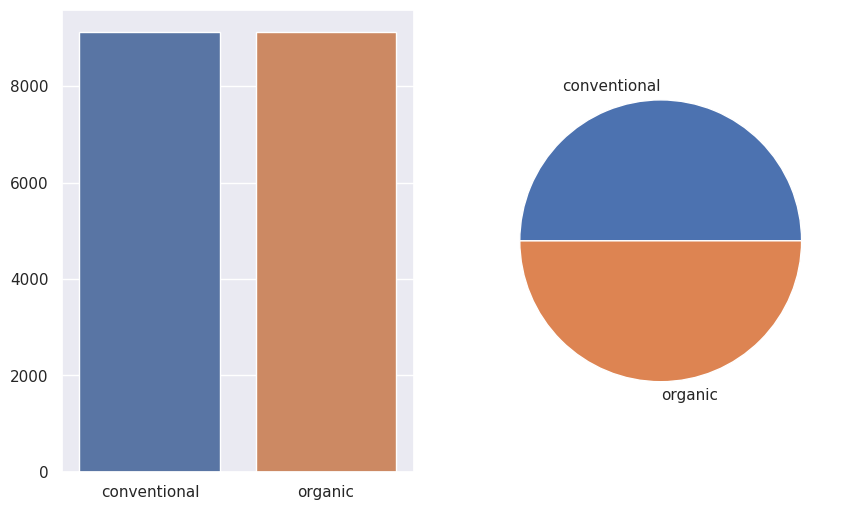

In [15]:
x = avocado['type'].unique()
y = [avocado['type'].value_counts()['conventional'], avocado['type'].value_counts()['organic']]

fig, ax = plt.subplots(1, 2, figsize = (10,6))
sns.barplot(x = x,
            y = y, ax = ax[0])
plt.pie(x = y, labels = x)



Text(0.5, 1.0, 'Bags Proportion')

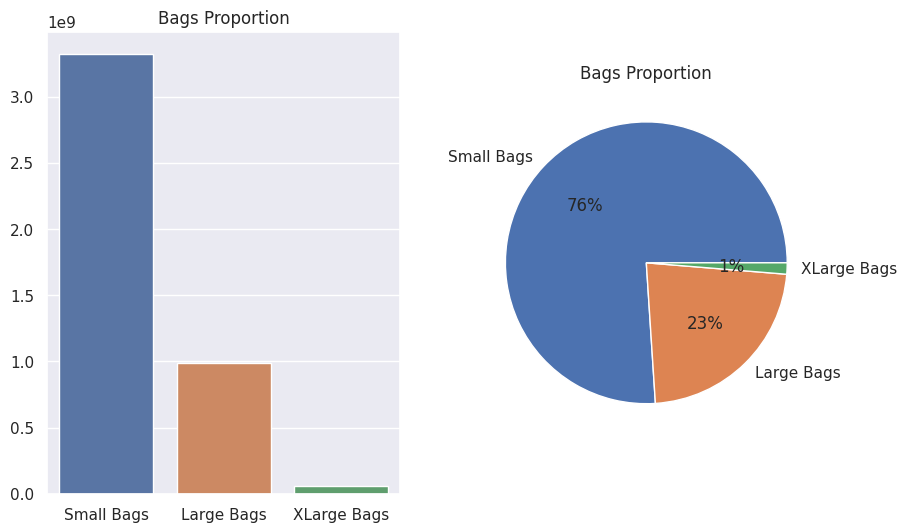

In [18]:
y = [avocado['Small Bags'].sum(), avocado['Large Bags'].sum(), avocado['XLarge Bags'].sum()]
x = ['Small Bags', 'Large Bags', 'XLarge Bags']


fig, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.barplot(x = x, y = y, ax = ax[0]).set(title = 'Bags Proportion')
plt.pie(x = y, labels = x, autopct = '%.f%%')

plt.title('Bags Proportion')

Text(0.5, 1.0, 'Dimensions Proportion')

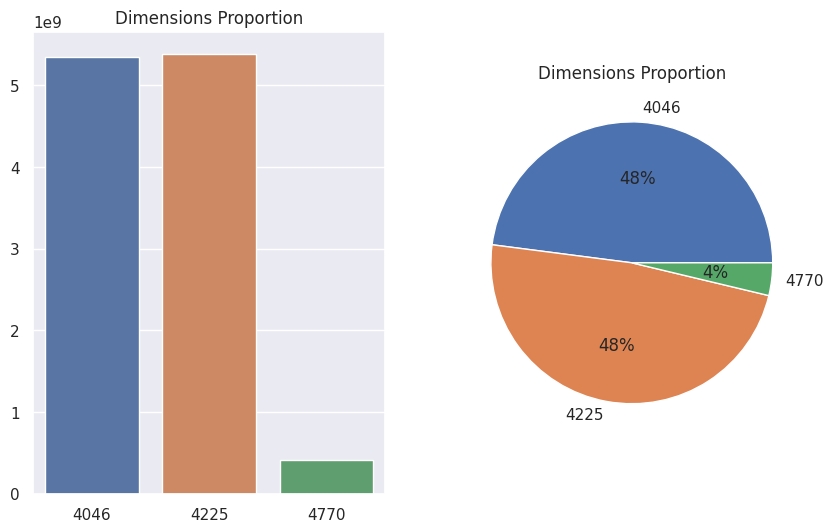

In [20]:
y = [avocado['4046'].sum(), avocado['4225'].sum(), avocado['4770'].sum()]
x = ['4046', '4225', '4770']


fig, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.barplot(x = x, y = y, ax = ax[0]).set(title = 'Dimensions Proportion')
plt.pie(x = y, labels = x, autopct = '%.0f%%')

plt.title('Dimensions Proportion')

Text(0.5, 1.0, 'Line Graph')

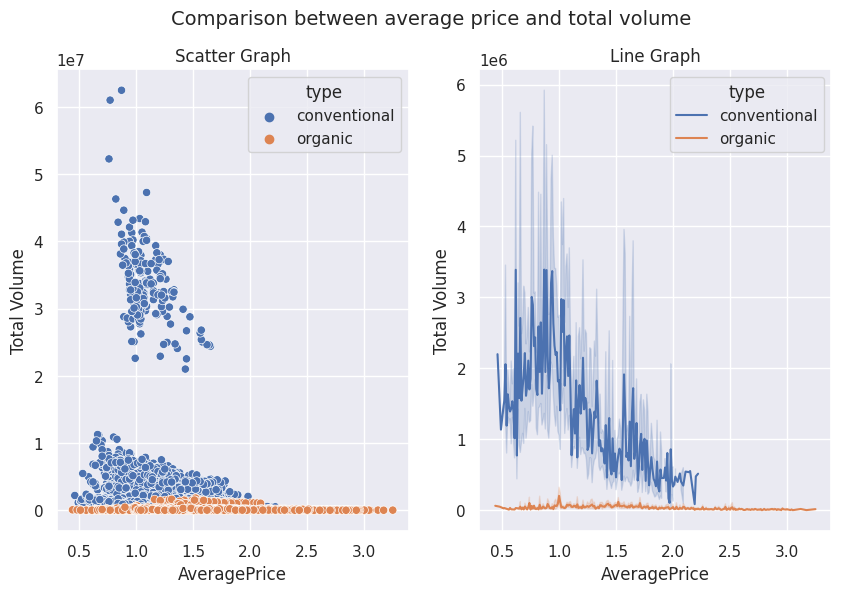

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))

fig.suptitle('Comparison between average price and total volume', fontsize = 14)

sns.scatterplot(x = avocado['AveragePrice'],
                y = avocado['Total Volume'],
                hue = avocado['type'],
                ax = ax[0])

sns.lineplot(data = avocado, x = 'AveragePrice', y = 'Total Volume', hue = 'type', ax = ax[1])


ax[0].set_title('Scatter Graph')
ax[1].set_title('Line Graph')

In [22]:


regions = avocado['region'].unique()

average_price_mean = []

for i in regions:
  filter = avocado['region'] == i
  average_price_mean.append(avocado[filter]['AveragePrice'].mean())

price_per_region = pd.DataFrame({
    'Regions':regions,
    'Price(mean)': average_price_mean
}).sort_values('Price(mean)')


Text(0.5, 1.0, 'Highest Price')

<Figure size 1000x600 with 0 Axes>

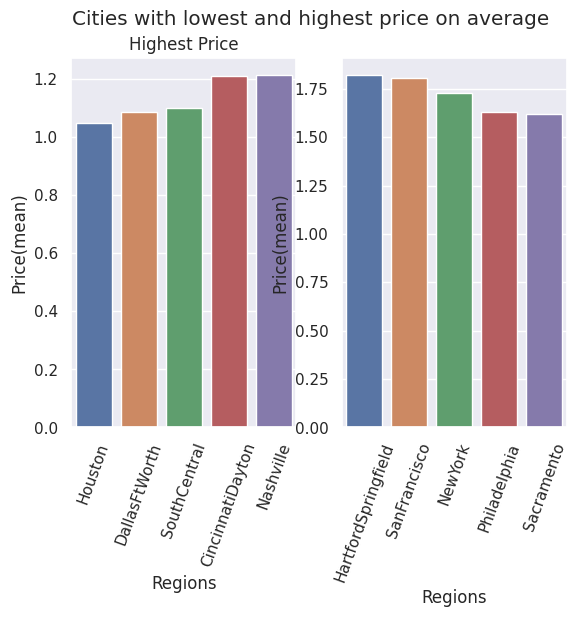

In [32]:
plt.figure(figsize = (10,6))

fig, ax = plt.subplots(1, 2)

sns.barplot(x = price_per_region['Regions'][:5],
            y = price_per_region['Price(mean)'][:5], ax = ax[0])

sns.barplot(x = price_per_region['Regions'][49:54][::-1],
            y = price_per_region['Price(mean)'][49:54][::-1], ax = ax[1])

fig.suptitle('Cities with lowest and highest price on average')

ax[0].tick_params(axis = 'x', labelrotation = 70)
ax[0].set_title('Lowest Price')
ax[1].tick_params(axis = 'x', labelrotation = 70)
ax[0].set_title('Highest Price')

In [28]:
price_per_region['Regions'][49:54][::-1]

17    HartfordSpringfield
42           SanFrancisco
28                NewYork
32           Philadelphia
40             Sacramento
Name: Regions, dtype: object

In [42]:
Average_price_by_year = {'Type':[], 'Price':[], 'Year':[]}

years = [2015, 2016, 2017, 2018]
types = ['Organic', 'Conventional', 'Both']

In [43]:
for year in years:
    for typ in types:
        Average_price_by_year['Year'].append(year)
        Average_price_by_year['Type'].append(typ)


    Filter_organic = (
        (avocado['Date'] >= str(year)) & (avocado['Date'] < str(year+1)) &  (avocado['type'] == 'organic')
    )


    Filter_conventional = (
        (avocado['Date'] >= str(year)) & (avocado['Date'] < str(year+1)) &  (avocado['type'] == 'conventional')
    )



    Organic_mean = (avocado[Filter_organic]['AveragePrice']).mean()
    Conventional_mean = (avocado[Filter_conventional]['AveragePrice']).mean()
    Total_mean = (Organic_mean + Conventional_mean) / 2


    Average_price_by_year['Price'].append(Organic_mean)
    Average_price_by_year['Price'].append(Conventional_mean)
    Average_price_by_year['Price'].append(Total_mean)


    year += 1

Text(0.5, 1.0, 'Avarage price of each year')

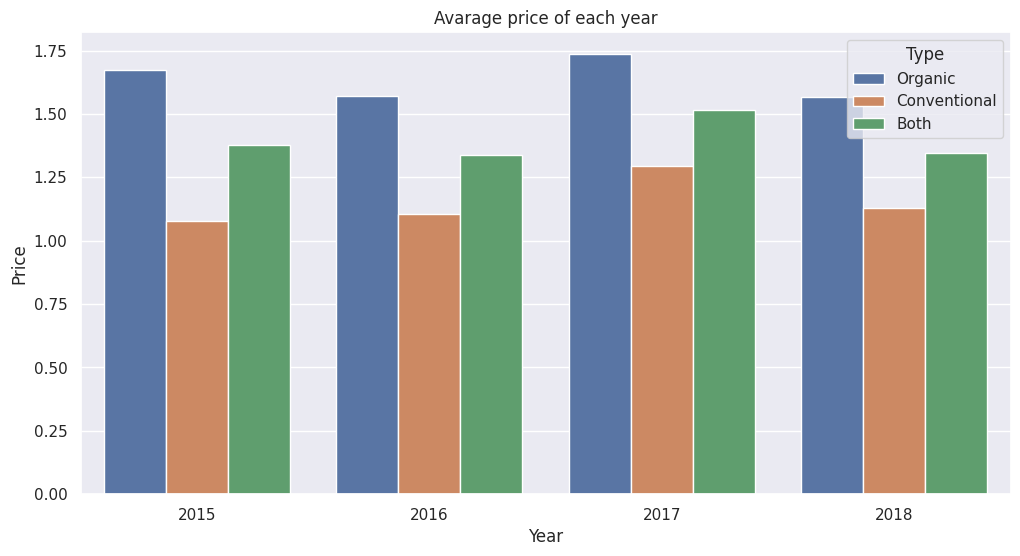

In [45]:

plt.figure(figsize=(12,6))
Average_price_by_year = pd.DataFrame(Average_price_by_year)
sns.barplot(data=Average_price_by_year, x="Year", y="Price", hue="Type")
plt.title('Average price of each year')